## Gold Price Prediction using Random Forest Regressor

This dataset is obtained from https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data/discussion/445497.
It contains the price/index values of SPX (S&P 500), GLD (gold), USO (US Oil Fund), SLV (Silver price) and EUR/USD (exchange rate) from 1/2/2008 to 5/16/2018. Our goal in this project is to predict the Gold Price using the prices/values of the other indexes. 

### The Data

#### Importing Dataset and Python Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv('gld_price_data.csv')

#### Looking at the Dataset

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [20]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


#### Checking for Missing Values and Duplicates

In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
df.duplicated().value_counts()

False    2290
Name: count, dtype: int64

#### Looking at the Correlation of Variables

In [18]:
correlation = df.corr(numeric_only=True)

<Axes: >

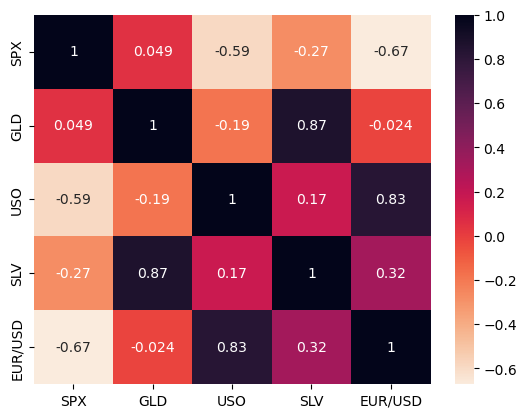

In [19]:
sns.heatmap(correlation, annot=True, cmap='rocket_r')

**We can clearly see here that GLD has a high positive correlation with SLV**

#### Looking at the distribution of GLD

<Axes: xlabel='GLD', ylabel='Density'>

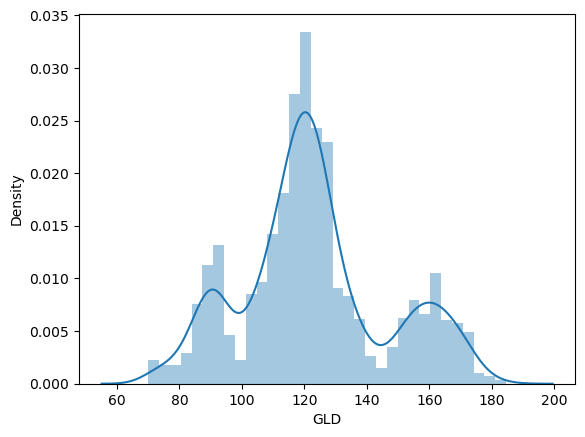

In [45]:
sns.distplot(df['GLD'])

Most of the Gold price is between 100 to 140 range

### The Model

#### Splitting Data into Features and Target Variable

In [47]:
X = df.drop(['Date','GLD'], axis=1)
y = df['GLD']

In [48]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [49]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

#### Splitting Data into Training and Test Set

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Training the model

In [51]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, y_train)

RandomForestRegressor()

#### Evaluating Model and Making Predictions

In [52]:
y_pred = regressor.predict(X_test)

In [53]:
print(y_pred)

[168.69609898  81.97670002 115.90079999 127.78620032 120.59510101
 154.48859814 150.23279901 126.15440051 117.5600987  125.89790113
 116.7720014  172.05000075 141.5486991  167.75309842 115.12970008
 117.62270047 138.04570298 170.12530039 160.0173035  158.39299904
 155.25650033 125.64190037 176.49329903 157.37970339 125.27600044
  93.8414995   77.78860019 120.83189996 119.129099   167.46339935
  88.36220061 125.06859954  91.1544004  117.77180008 121.19489933
 136.07160083 115.89030111 114.97160068 147.77789932 107.11390094
 104.13190226  87.15619788 126.50300053 118.27670014 153.26879916
 119.58389994 108.48259987 108.45779813  92.93000028 127.22649769
  74.75350034 113.60089936 121.21590036 111.25699882 118.81669877
 121.17669931 159.6344004  167.83370115 147.16659714  85.86369874
  94.2746002   86.74219875  90.5983     118.96150067 126.51240063
 127.59400023 170.49000068 122.33959916 117.3227985   98.58180046
 168.00230124 143.20869816 131.41380208 121.2729023  121.42099943
 119.49630

**Now comparing predicted values with actual values**

In [55]:
from sklearn.metrics import r2_score

In [61]:
error_score=r2_score(y_test,y_pred)
print(f"The R squared error score: {error_score}")

The R squared error score: 0.9892805143769003


#### Comparing actual values and predicted values in a plot

In [62]:
y_test = list(y_test) #converting to a list

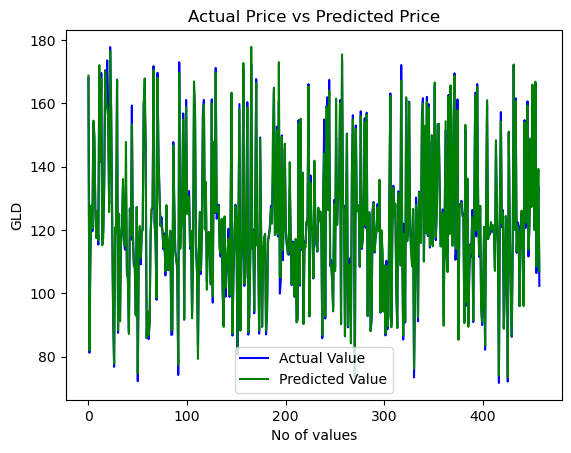

In [65]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('No of values')
plt.ylabel('GLD')
plt.legend()
plt.show()

**The values are pretty close to each other, the error is just 0.98**

### Conclusion

We have used Random Forest Regression to predict Gold price with our data spanning 10 years. We have created a model which pretty accuratly predicts GLD price with an error of 0.98